# Symmetry protected Topological (SPT) states in graphene

*Topological Phases in Graphene Nanoribbons: Junction States, Spin Centers, and Quantum Spin Chains*, Ting Cao, Fangzhou Zhao, and Steven G. Louie, PRL 2017

In [152]:
# We'll have 3D plotting and 2D band structure, so we need a handful of helper functions.

%run matplotlib_setup.ipy

from types import SimpleNamespace

from ipywidgets import interact
import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy as np
import scipy.linalg as la 

import kwant
from kwant.wraparound import wraparound, plot_2d_bands


def momentum_to_lattice(k):
    """Transform momentum to the basis of reciprocal lattice vectors.
    
    See https://en.wikipedia.org/wiki/Reciprocal_lattice#Generalization_of_a_dual_lattice
    """
    B = np.array(graphene.prim_vecs).T
    A = B.dot(np.linalg.inv(B.T.dot(B)))
    return np.linalg.solve(A, k)


def dispersion_2D(syst, args=None, lim=1.5*np.pi, num_points=200):
    """A simple plot of 2D band structure."""
    if args is None:
        args = []
    momenta = np.linspace(-lim, lim, num_points)
    energies = []
    for kx in momenta:
        for ky in momenta:
            lattice_k = momentum_to_lattice([kx, ky])
            h = syst.hamiltonian_submatrix(args=(list(args) + list(lattice_k)))
            energies.append(np.linalg.eigvalsh(h))
    
    energies = np.array(energies).reshape(num_points, num_points, -1)
    emin, emax = np.min(energies), np.max(energies)
    kx, ky = np.meshgrid(momenta, momenta)
    fig = pyplot.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')
    for band in range(energies.shape[-1]):
        axes.plot_surface(kx, ky, energies[:, :, band], cstride=2, rstride=2,
                          cmap=matplotlib.cm.RdBu_r, vmin=emin, vmax=emax,
                          linewidth=0.1)

# Graphene

![](imag/g3.png)

First let us compute the dispersion of pristine periodic graphene 

In [4]:
graphene = kwant.lattice.general([[np.sqrt(3)/2,1/2],[np.sqrt(3)/2,-1/2]],  #Lattice vectors 
                                  [[0,0],[1/np.sqrt(3),0]]) # Co-ordinates
a,b = graphene.sublattices

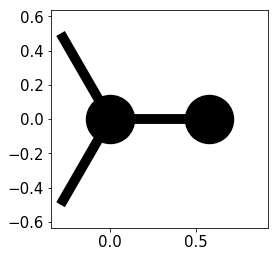

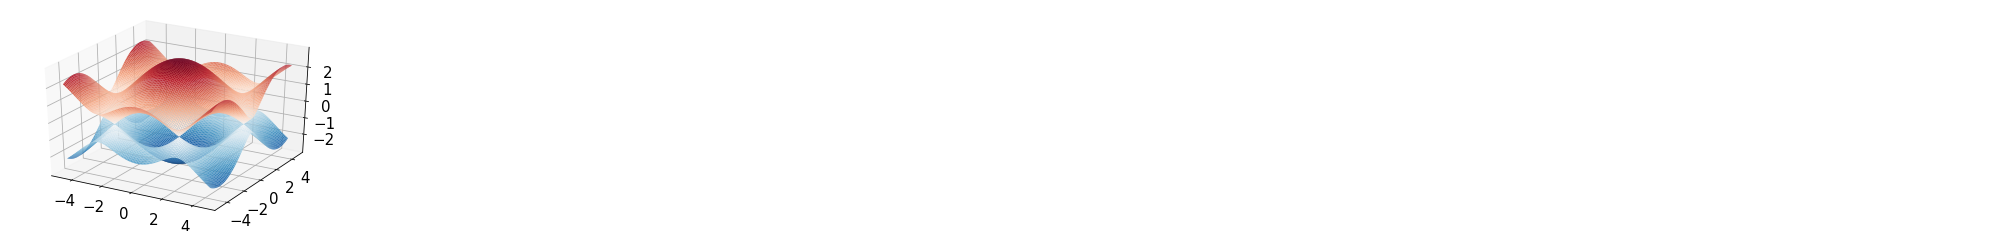

In [5]:
bulk_graphene = kwant.Builder(kwant.TranslationalSymmetry(*graphene.prim_vecs))
bulk_graphene[graphene.shape((lambda pos: True), (0, 0))] = 0
bulk_graphene[graphene.neighbors(1)] = 1
kwant.plot(bulk_graphene)
dispersion_2D(wraparound(bulk_graphene).finalized())

We observe zero band gap with dirac cones at kx = ky =0

Now let us construct nanoribbons with different edge terminations discussed in S. G. Louie PRL 2017

In [138]:
Zigzag = kwant.lattice.general([[1,0],[0,np.sqrt(3)/3]], #Lattice vectors
                                     [[1/6,0],[2/6,np.sqrt(3)/2],[4/6,np.sqrt(3)/2],[5/6,0]]) # Coordinates

### *Note that the basis positions specified here are in carteisian co-ordinated and NOT in the reduced lattice vector coordinates*

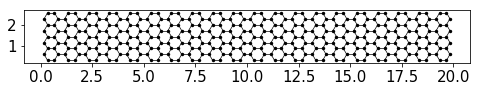

interactive(children=(IntSlider(value=0, description='i', max=30), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_wf(i=0)>

In [163]:
#Z_ribbon = kwant.Builder(kwant.TranslationalSymmetry(Zigzag.prim_vecs[0]))
Z_ribbon = kwant.Builder()
Z_ribbon[Zigzag.shape((lambda pos: pos[1] > 0 and pos[1]< 2.8 and pos[0] > 0 and pos[0] < 20), (0,0))] = 0 
Z_ribbon[Zigzag.neighbors()] = 1 
kwant.plot(Z_ribbon);
Z_ribbon = Z_ribbon.finalized()
ham = Z_ribbon.hamiltonian_submatrix()

eig_val, eig_vec = la.eigh(ham)

from ipywidgets import interact
def plot_wf(i=0):
    print("Plotting wave function with index", i)
    print("energy:", eig_val[i],"x t") 
    kwant.plotter.map(Z_ribbon, abs(eig_vec[:, i])**2)
    
interact(plot_wf, i=(0, 30))

array([1., 0.])

0.16666666666666666